In [1]:
import numpy as np
import matplotlib.pyplot as plt

## XOR data

In [2]:
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)],dtype=np.float)
y_seeds = np.array([[0],[1],[1],[0]])
y_seeds.shape

<ipython-input-2-4224e6358b38>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)],dtype=np.float)


(4, 1)

In [3]:
N = 1000
idxs = np.random.randint(0,4,N)

In [4]:
X = x_seeds[idxs]
Y = y_seeds[idxs]
print("X shape : " + str(X.shape) + "\nY shape : " + str(Y.shape))
# print(Y[:,0] == 1)

X shape : (1000, 2)
Y shape : (1000, 1)


In [5]:
X += np.random.normal(scale = 0.25, size = X.shape)

In [6]:
idxs_1 = np.where(Y[:,0]==1)
idxs_0 = np.where(Y[:,0]==0)

In [7]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [8]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

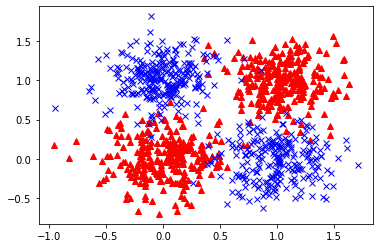

In [9]:
# plt.clf()
plt.plot(X_0[:,0],X_0[:,1],"r^")
plt.plot(X_1[:,0],X_1[:,1],"bx")
plt.show()

## Model

In [10]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = (num_hiddens,1))
        self.W2 = np.random.normal(size = (1,num_hiddens))
        self.b2 = np.random.normal(size = (1,1))
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def predict(self,X):
        z1 = np.dot(self.W1,X.T) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(self.W2,a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1,a1,z2,a2)
    
    def compute_cost(self,A2,Y):
        m = Y.shape[0] # number of examples

        # Compute the cross-entropy cost
        logprobs = np.multiply(np.log(A2),Y.T) + np.multiply(np.log(1-A2),1-Y.T)
        cost = -np.sum(logprobs)/m
        cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                        # E.g., turns [[17]] into 17 

        return cost

In [11]:
def train(X,Y,model,lr=0.1):
    
    A2,(Z1,A1,Z2,_) = model.predict(X)
    cost = model.compute_cost(A2,Y)
    
    m = len(X)
    
    dZ2 = A2 - Y.T
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.multiply(np.dot(model.W2.T,dZ2),(1-np.power(A1,2)))

    dW1 = np.dot(dZ1,X)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m

    model.W1 = model.W1 - lr * dW1
    model.b1 = model.b1 - lr * db1
    model.W2 = model.W2 - lr * dW2
    model.b2 = model.b2 - lr * db2
    return cost

In [12]:
import time
import math

model = shallow_neural_network(2,3)
start = time.time()
for epoch in range(300):
    cost = train(X,Y,model,1.0)
    if epoch % 10 == 0:
        print(epoch,cost)
end = time.time()
print(f"{end - start:.5f} sec")

0 0.7339680299396288
10 0.6776857942520359
20 0.6430052345106885
30 0.5926259884347846
40 0.5185778948130151
50 0.426866866783189
60 0.35032610690633975
70 0.2965065972880879
80 0.26067814649875176
90 0.23633486908571583
100 0.2190586657429334
110 0.20625944894306905
120 0.19643416230533445
130 0.18867969580116697
140 0.1824265529379472
150 0.17729780105538073
160 0.17303306671151422
170 0.16944599058256074
180 0.16639929118714175
190 0.16378945588336313
200 0.1615369326424351
210 0.15957960706970456
220 0.15786832423349909
230 0.15636373109715948
240 0.15503399967212667
250 0.1538531539016476
260 0.15279982019430077
270 0.15185628122871478
280 0.15100775060541033
290 0.15024181073025897
0.10744 sec


In [13]:
print(model.predict(np.array([(0,0)]))[0].item())
print(model.predict(np.array([(0,1)]))[0].item())
print(model.predict(np.array([(1,0)]))[0].item())
print(model.predict(np.array([(1,1)]))[0].item())

0.03996405147227507
0.9894381900464905
0.986829601693871
0.005126942752881384
